# OpenBB Quantitative Risk Analysis

### This notebook demonstrates building a quantitate risk assesment model using following components:

Data Acquisition: Historical price data fetched via obb.stocks.price.historical.
Return Calculation: Daily returns computed using pandas' pct_change() function.
Risk Metrics:

Value at Risk (VaR): Estimates potential losses at a 95% confidence level.
Conditional Value at Risk (CVaR): Measures expected losses beyond VaR.


Portfolio Analysis:

Efficient Frontier: Plots optimal portfolios based on risk-return tradeoffs.
Sharpe Ratio: Evaluates risk-adjusted returns.


Market Comparison:

Capital Asset Pricing Model (CAPM): Analyzes asset performance relative to the market.
Beta (β): Measures asset volatility compared to the market.
Alpha (α): Indicates excess returns over CAPM predictions.


Statistical Measures:

Standard Deviation: Quantifies price volatility.
Covariance and Correlation: Assess relationships between assets.


Visualizations:

Returns Distribution: Histogram of daily returns.
Efficient Frontier Plot: Risk-return characteristics of portfolios.
CAPM Plot: Visualizes the asset's performance against the market.



This model combines historical data analysis, statistical risk measures, portfolio theory, and market comparison tools to provide a multi-faceted view of an asset's risk and return profile. It enables investors to assess potential losses, understand risk-return tradeoffs, evaluate market-relative performance, and analyze return patterns and volatility.

## Author
### Ashutosh Shukla

In [ ]:
!pip install openbb

In [81]:
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
#using the help command to understand the functionality of the platform
help(obb)

Help on App in module openbb_core.app.static.app_factory object:

class App(BaseApp, openbb.package.__extensions__.Extensions)
 |  App(command_runner: openbb_core.app.command_runner.CommandRunner)
 |  
 |  Method resolution order:
 |      App
 |      BaseApp
 |      openbb.package.__extensions__.Extensions
 |      openbb_core.app.static.container.Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __repr__(self) -> str
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from BaseApp:
 |  
 |  __init__(self, command_runner: openbb_core.app.command_runner.CommandRunner)
 |      Initialize the app.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties inherited from BaseApp:
 |  
 |  account
 |      Account menu.
 |  
 |  coverage
 |      Coverage menu.
 |  
 |  reference
 |      Return reference data.
 |  
 |  system
 |      System settings.
 |  
 |  user
 |      User

In [83]:
#to Better understand the structure and the features available with openBB we can use https://docs.openbb.co/
obb

OpenBB Platform v4.3.3

Utilities:
    /account
    /user
    /system
    /coverage

Routers:
    /commodity
    /crypto
    /currency
    /derivatives
    /economy
    /equity
    /etf
    /fixedincome
    /index
    /news
    /regulators

Extensions:
    - commodity@1.2.3
    - crypto@1.3.3
    - currency@1.3.3
    - derivatives@1.3.3
    - economy@1.3.3
    - equity@1.3.3
    - etf@1.3.3
    - fixedincome@1.3.3
    - index@1.3.3
    - news@1.3.3
    - regulators@1.3.3

    - benzinga@1.3.3
    - bls@1.0.1
    - cftc@1.0.1
    - econdb@1.2.3
    - federal_reserve@1.3.3
    - fmp@1.3.3
    - fred@1.3.3
    - imf@1.0.0
    - intrinio@1.3.3
    - oecd@1.3.3
    - polygon@1.3.3
    - sec@1.3.3
    - tiingo@1.3.3
    - tradingeconomics@1.3.3
    - yfinance@1.3.4    

In [84]:
#We can get a list of tickers from Yahoo Finance and use the model to leverage our Quantitative Risk assessment model

import yfinance as yf

# Example: Download S&P 500 tickers from Wikipedia and fetch their data
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print(sp500_tickers)

# Fetching data for one ticker, example 'AAPL'
data = yf.Ticker('AAPL').history(period='5y')
print(data.head())


[    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North

In [85]:
# Function to fetch historical data
def get_historical_data(ticker, start_date, end_date):
    """
    Fetch historical price data for a given ticker.
    
    :param ticker: Stock ticker symbol
    :param start_date: Start date for historical data
    :param end_date: End date for historical data
    :return: DataFrame with historical price data
    """
    return obb.equity.price.historical(symbol=ticker, start_date=start_date, end_date=end_date)

In [86]:
# Function to calculate daily returns
def calculate_returns(data):
    """
    Calculate daily returns from price data.
    
    :param data: DataFrame with 'Close' price column
    :return: DataFrame with daily returns
    """
    return data['close'].pct_change().dropna()

In [87]:
# Function to calculate Value at Risk (VaR)
# VaR - Estimates the maximum potential loss over a given time period with a certain confidence level (e.g., 95% in our case) .
def calculate_var(returns, confidence_level=0.95):
    """
    Calculate Value at Risk (VaR) for a given confidence level.
    
    :param returns: Series of returns
    :param confidence_level: Confidence level for VaR calculation
    :return: VaR value
    """
    return np.percentile(returns, (1 - confidence_level) * 100)

In [88]:
# Function to calculate Conditional Value at Risk (CVaR)
# CVaR- An extension of VaR, CVaR provides the expected loss given that the loss exceeds the VaR threshold.
# Interpretation: CVaR offers more insight into the tail risk compared to VaR alone, which focuses on a specific percentile of loss distribution.
def calculate_cvar(returns, confidence_level=0.95):
    """
    Calculate Conditional Value at Risk (CVaR) for a given confidence level.
    
    :param returns: Series of returns
    :param confidence_level: Confidence level for CVaR calculation
    :return: CVaR value
    """
    var = calculate_var(returns, confidence_level)
    return returns[returns <= var].mean()

In [89]:
# Function to calculate and plot the efficient frontier
# An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk.
def plot_efficient_frontier(tickers, start_date, end_date, num_portfolios=10000):
    """
    Calculate and plot the efficient frontier for a given set of tickers.
    
    :param tickers: List of stock ticker symbols
    :param start_date: Start date for historical data
    :param end_date: End date for historical data
    :param num_portfolios: Number of portfolios to simulate
    """
    # Fetch historical data for all tickers
    data = pd.DataFrame()
    for ticker in tickers:
        stock_data = get_historical_data(ticker, start_date, end_date)
        stock_data = stock_data.to_df()
        data[ticker] = stock_data['close']
    
    # Calculate returns
    returns = data.pct_change().dropna()
    
    # Calculate mean returns and covariance matrix
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    
    # Generate random portfolios or (later we can incorporate user portfolios)
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        portfolio_return = np.sum(mean_returns * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
        
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = portfolio_return / portfolio_std_dev
    
    # Plot efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.show()
    
     # Explanation for the graph:
    print("\n### How to Read the Efficient Frontier Graph ###\n")
    print("- **X-axis (Standard Deviation)**: This measures the risk of the portfolio, i.e., how much the portfolio's return fluctuates.")
    print("- **Y-axis (Expected Return)**: This shows the annualized return you can expect from the portfolio based on past data.")
    print("- **Sharpe Ratio (Color Gradient)**: A measure of the risk-adjusted return. A higher Sharpe ratio means you are getting more return for each unit of risk.")
    print("- **Efficient Frontier**: The portfolios on the upper edge of the scatter plot represent the most efficient ones, meaning they provide the highest return for the least risk.")
    

In [90]:
# Function to calculate and plot CAPM
"""
CAPM - A model that describes the relationship between systematic risk and expected return for assets.
We use it to calculate two important metrics:
a. Beta (β):

Measures the volatility of an asset in relation to the overall market.
β > 1 indicates higher volatility than the market, β < 1 indicates lower volatility.

b. Alpha (α):

Represents the excess return of an asset over the return predicted by CAPM.
Positive alpha suggests the asset outperformed its beta-predicted return.
"""

def plot_capm(ticker, market_ticker, start_date, end_date):
    """
    Calculate and plot the Capital Asset Pricing Model (CAPM) for a given ticker.
    
    :param ticker: Stock ticker symbol
    :param market_ticker: Market index ticker symbol (e.g., '^GSPC' for S&P 500)
    :param start_date: Start date for analysis
    :param end_date: End date for analysis
    """
    # Fetch historical data
    stock_data = get_historical_data(ticker, start_date, end_date)
    stock_data = stock_data.to_df()
    market_data = get_historical_data(market_ticker, start_date, end_date)
    market_data = market_data.to_df()
    
    # Calculate returns
    stock_returns = calculate_returns(stock_data)
    market_returns = calculate_returns(market_data)
    
    # Combine returns
    combined_returns = pd.concat([stock_returns, market_returns], axis=1).dropna()
    combined_returns.columns = ['Stock', 'Market']
    
    # Calculate beta
    covariance = combined_returns.cov().iloc[0, 1]
    market_variance = combined_returns['Market'].var()
    beta = covariance / market_variance
    
    # Calculate alpha
    risk_free_rate = 0.02  # Assume a 2% risk-free rate
    alpha = combined_returns['Stock'].mean() - (risk_free_rate + beta * (combined_returns['Market'].mean() - risk_free_rate))
    
    # Plot CAPM
    plt.figure(figsize=(10, 6))
    plt.scatter(combined_returns['Market'], combined_returns['Stock'], alpha=0.5)
    plt.xlabel('Market Returns')
    plt.ylabel('Stock Returns')
    plt.title(f'CAPM for {ticker}')
    
    # Add regression line
    x = np.linspace(combined_returns['Market'].min(), combined_returns['Market'].max(), 100)
    y = risk_free_rate + beta * (x - risk_free_rate)
    plt.plot(x, y, 'r', label=f'Beta: {beta:.2f}, Alpha: {alpha:.2%}')
    
    plt.legend()
    plt.show()
    
    print(f"Beta: {beta:.2f}")
    print(f"Alpha: {alpha:.2%}")
    
     # Explanation for the user
    print("\n### Reading the Graph ###\n")
    print("- **Market Returns (X-axis)**: This shows the returns of the overall market (e.g., S&P 500).")
    print("- **Stock Returns (Y-axis)**: This represents the returns of the stock you're analyzing, ")
    print("- **Red Line (CAPM Line)**: The red line is the expected return based on the Capital Asset Pricing Model.")
    print("  - If most data points lie above this line, the stock has outperformed its expected return (positive alpha).")
    print("  - If points lie below this line, the stock has underperformed relative to its risk (negative alpha).")
    print("- **Beta**: The slope of the red line. A beta above 1 means the stock is more volatile than the market, while a beta below 1 means it's less volatile.")
    print("- **Alpha**: A measure of whether the stock has outperformed or underperformed based on its risk profile. Positive alpha means the stock has performed better than expected.")

In [91]:
# Main function to run the risk model
def run_risk_model(ticker, start_date, end_date, market_ticker='^GSPC'):
    """
    Run the complete risk model for a given ticker.
    
    :param ticker: Stock ticker symbol
    :param start_date: Start date for analysis
    :param end_date: End date for analysis
    :param market_ticker: Market index ticker symbol (default: '^GSPC' for S&P 500)
    """
    # Fetch historical data
    data = get_historical_data(ticker, start_date, end_date)
    data = data.to_df()
    print("Historical Data: ",data.head())
    # Calculate returns
    returns = calculate_returns(data)
    print("Returns : ",returns.head())
    
    # Calculate risk metrics
    var_95 = calculate_var(returns)
    cvar_95 = calculate_cvar(returns)
    
    
    # Print risk metrics
    print(f"Value at Risk (95% confidence): {var_95:.2%}")
    print(f"Conditional Value at Risk (95% confidence): {cvar_95:.2%}")
    
    # Plot returns distribution
    plt.figure(figsize=(10, 6))
    returns.hist(bins=50)
    plt.axvline(var_95, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(cvar_95, color='g', linestyle='dashed', linewidth=2)
    plt.title(f'Returns Distribution for {ticker}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.legend(['VaR (95%)', 'CVaR (95%)'])
    plt.show()
    
    # Calculate and plot efficient frontier
    plot_efficient_frontier([ticker, 'AAPL', 'GOOGL', 'MSFT'], start_date, end_date)
    
    # Calculate and plot CAPM
    plot_capm(ticker, market_ticker, start_date, end_date)

Historical Data:                    open        high         low       close   volume  \
date                                                                  
2020-01-02  231.000000  234.639999  230.160004  234.320007  3736300   
2020-01-03  231.600006  232.610001  230.300003  231.580002  2274500   
2020-01-06  229.929993  234.020004  229.490005  233.949997  3329300   
2020-01-07  235.000000  237.770004  234.759995  235.490005  5255200   
2020-01-08  235.679993  239.750000  235.479996  237.759995  3564700   

            split_ratio  dividend  
date                               
2020-01-02          0.0       0.0  
2020-01-03          0.0       0.0  
2020-01-06          0.0       0.0  
2020-01-07          0.0       0.0  
2020-01-08          0.0       0.0  
Returns :  date
2020-01-03   -0.011693
2020-01-06    0.010234
2020-01-07    0.006583
2020-01-08    0.009639
2020-01-09    0.020357
Name: close, dtype: float64
Value at Risk (95% confidence): -2.92%
Conditional Value at Risk (95% con

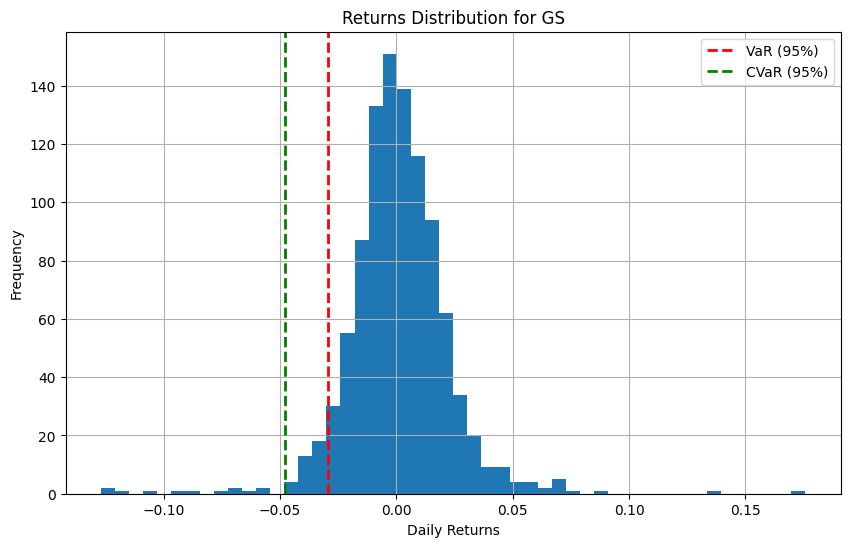

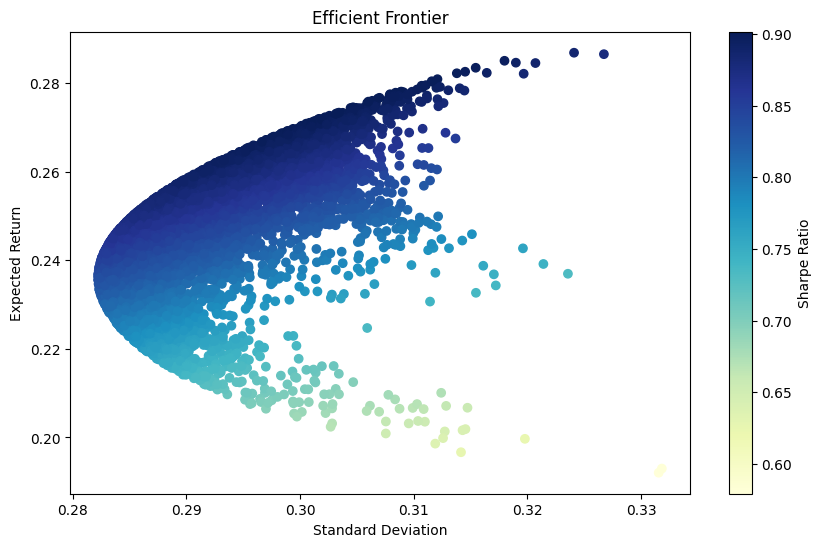


### How to Read the Efficient Frontier Graph ###

- **X-axis (Standard Deviation)**: This measures the risk of the portfolio, i.e., how much the portfolio's return fluctuates.
- **Y-axis (Expected Return)**: This shows the annualized return you can expect from the portfolio based on past data.
- **Sharpe Ratio (Color Gradient)**: A measure of the risk-adjusted return. A higher Sharpe ratio means you are getting more return for each unit of risk.
- **Efficient Frontier**: The portfolios on the upper edge of the scatter plot represent the most efficient ones, meaning they provide the highest return for the least risk.


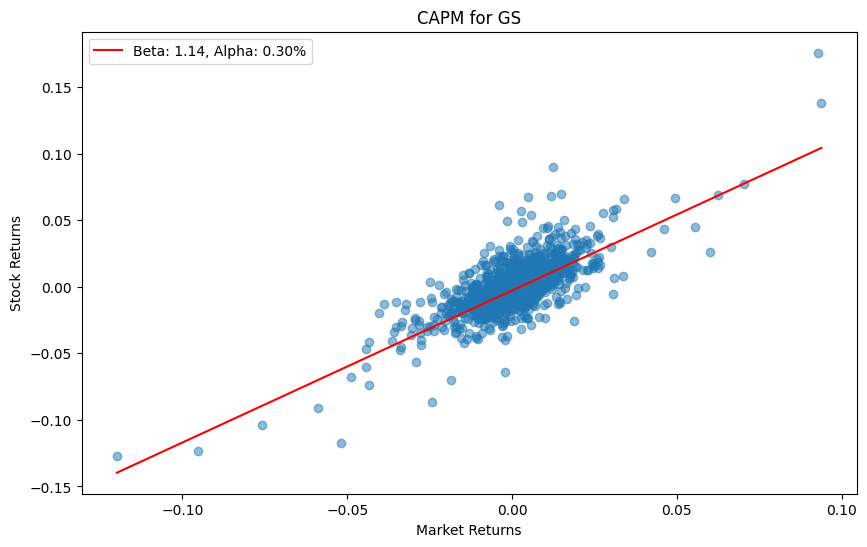

Beta: 1.14
Alpha: 0.30%

### Reading the Graph ###

- **Market Returns (X-axis)**: This shows the returns of the overall market (e.g., S&P 500).
- **Stock Returns (Y-axis)**: This represents the returns of the stock you're analyzing, 
- **Red Line (CAPM Line)**: The red line is the expected return based on the Capital Asset Pricing Model.
  - If most data points lie above this line, the stock has outperformed its expected return (positive alpha).
  - If points lie below this line, the stock has underperformed relative to its risk (negative alpha).
- **Beta**: The slope of the red line. A beta above 1 means the stock is more volatile than the market, while a beta below 1 means it's less volatile.
- **Alpha**: A measure of whether the stock has outperformed or underperformed based on its risk profile. Positive alpha means the stock has performed better than expected.


In [92]:
# Example usage
if __name__ == "__main__":
    ticker = "GS"
    start_date = "2020-01-01"
    end_date = "2023-12-31"
    run_risk_model(ticker, start_date, end_date)